# Decision Trees y Random Forest con Python y Scikit-Learn

## Introducción a Árboles de Decisión

Los árboles de decisión pertenecen a los algoritmos supervisados en el ámbito del Machine Learning y son utilizados en problemas de clasificación y regresión.

Los árboles de decisión **aprenden** de los datos a partir de **reglas if-else**; a medida que el árbol crece y obtiene más niveles se van generando divisiones conocidas como **nodos** y cuando un nodo no conduce a nuevas divisiones se le conoce como nodo terminal u **hoja**.

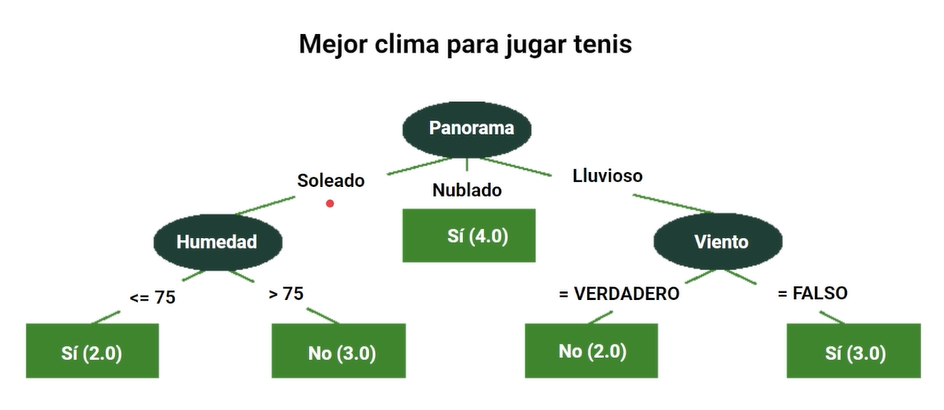

### Primer árbol de decisión con Scikit-Learn

Utilizaremos el dataset **Titanic** el cual contiene una variable target: **Survived Indicator** que indica si la persona sobrevivió o no a la tragedia; contiene otras 7 variables que hablan sobre la clase a la que pertenecía el pasajero, el sexo, la edad, entre otros.

#### Importamos las bibliotecas

In [4]:
#%pip install seaborn scikit-learn

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### Cargamos los datos

In [6]:
df = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


Vemos que el dataset consta de 887 observaciones de los pasajeros junto a 8 variables.

#### Exploración de los datos

Visualizamos los datos

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Ahora eliminamos columnas que no sean relevantes como Name o Fare ya que esta última repite la información que nos proporciona Pclass


In [8]:
# Eliminamos las columnas y guardamos el cambia en el mismo dataframe
df.drop(labels = ["Name", "Fare"], axis = "columns", inplace = True)

A continuación le cambiaremos el nombre a las columnas por unos más sencillos

In [9]:
# Renombramos las columnas
df.columns = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


Visualizamos que tenemos 887 observaciones y 6 variables

In [10]:
df.shape

(887, 6)

Análizamos los tipos de datos

In [11]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

Vemos que Sex es de tipo object así que lo siguiente será hacer One Hot Encoding para transformarla a una variable numérica

In [12]:
# Creamos una codificación para la columna Sex utilizando 0 y 1
df = pd.get_dummies(df, columns = ["Sex"], drop_first = True)

In [13]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


Vemos que el nombre de la variable cambió así que la renombramos

In [14]:
df.rename(columns = {"Sex_male" : "Sex"}, inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


Por último, ordenamos las columnas por nombre

In [15]:
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


#### Creación del modelo

Lo primero es separar en las variables predictoras X y la variable target Y

In [16]:
# Las variables predictoras son todas menos Survived
X = df.drop("Survived", axis = 1)
# La variable target es Survived
y = df.Survived

Ahora separamos los datos entre training (70%) y testing (30%)

In [17]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, train_size = 0.3, random_state = 42)

Lo siguiente es crear el modelo

In [19]:
"""
Creamos el modelo con una profundidad máxima de 2 ya que no contamos con muchos datos y este algoritmo tiende al overfitting
Utilizamos una semilla para reproducibilidad
"""
model = DecisionTreeClassifier(max_depth = 2, random_state = 42)

#### Entrenamiento del modelo

Procedemos a entrenar el modelo con los datos de training

In [20]:
model.fit(XTrain, yTrain)

DecisionTreeClassifier(max_depth=2, random_state=42)

#### Evaluación del modelo

Vamos a realizar la predicción tanto con training como con testing para realizar una comparación

In [21]:
# Predicciones con el target de training
yTrainPred = model.predict(XTrain)
# Predicciones con el target de testing
yTestPred = model.predict(XTest)

Ahora realizaremos el cálcula de las métricas; en este caso utilizaremos el Accuracy Score porque es un problema de clasificación

In [23]:
# Calculamos el Accuracy Score con el target de training y las predicciones con el target de training
trainAccuracy = accuracy_score(yTrain, yTrainPred)
# Calculamos el Accuracy Score con el target de testing y las predicciones con el target de testing
testAccuracy = accuracy_score(yTest, yTestPred)

print(f"El Accuracy Score para Train es {trainAccuracy}")
print(f"El Accuracy Score para Test es {testAccuracy}")

El Accuracy Score para Train es 0.8120300751879699
El Accuracy Score para Test es 0.784219001610306


Vemos que los valores son cercanos entre sí lo cual es positivo

Finalmente, verificamos el feature importances para entender cuáles variables tienen más importancia en el modelo

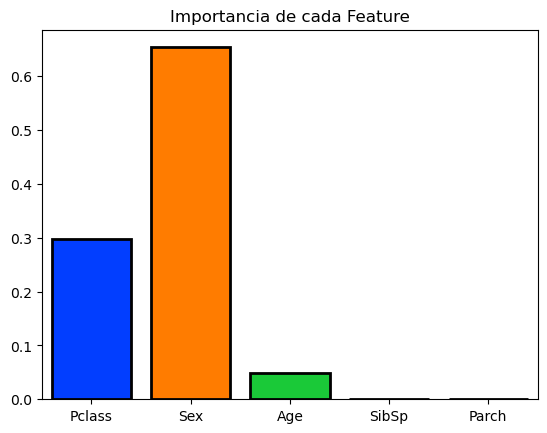

In [30]:
# Almacenamos la importancia de cada feature
importances = model.feature_importances_
# Creamos una variable que almacena los nombres de las variables predictoras
columns = X.columns

sns.barplot(
    # Columnas en el eje X
    x = columns,
    # Importancia en el eje Y
    y = importances,
    # Utilizamos la paleta Bright
    palette = "bright",
    # Saturación
    saturation = 2.0,
    # Bordes de las barras de color negro
    edgecolor = "black",
    # Líneas gruesas
    linewidth = 2
)
# Colocamos el título
plt.title("Importancia de cada Feature")
plt.show()

Podemos observar que las features con mayor peso son Sex, Pclass y Age; como las variables SibSp y Parch no tienen mucho peso podríamos optar por eliminarlas del modelo

### Cómo funcionan los Árboles de Decisión

En árboles de decisión tenemos un **nodo raíz** del cual partimos y a partir de este vamos analizando diferentes alternativas; a medida que avanzamos vamos evaluando varias opciones, estas opciones son los **nodos de decisión**; cuando llegamos al final de una alternativa y no podemos seguir creciendo el árbol entonces llegamos a un **nodo hoja**.

A medida que agregamos complejidad el árbol va creciendo y creciendo; si no queremos que el árbol crezca más de cierto nivel entonces podemos realizar una poda (**pruning**), es decir, cortar el árbol en algún punto.

Una **rama** son nodos de decisión y las divisiones que se generan a partir de evaluar dicha alternativa.

Por último, tenemos **nodos hijos** que son nodos que se derivan a partir de otros nodos conocidos como **nodos padres**.

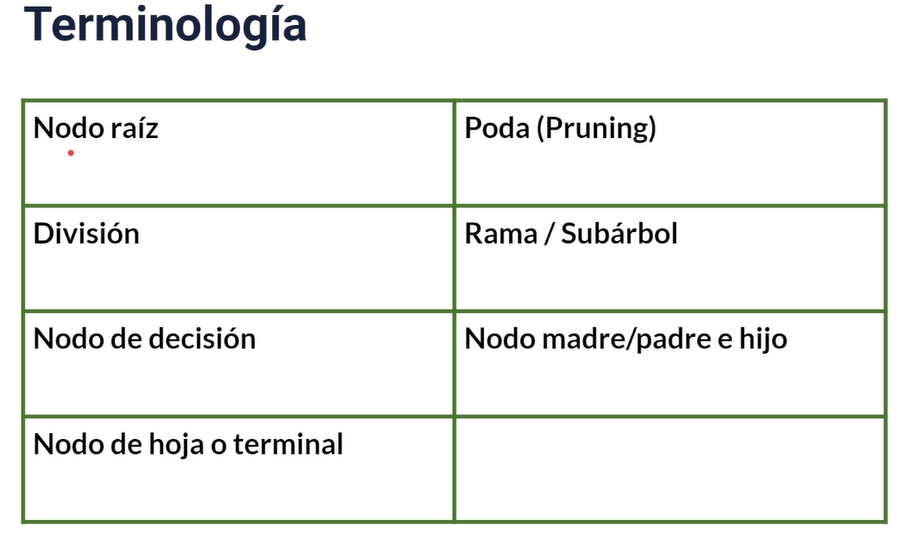

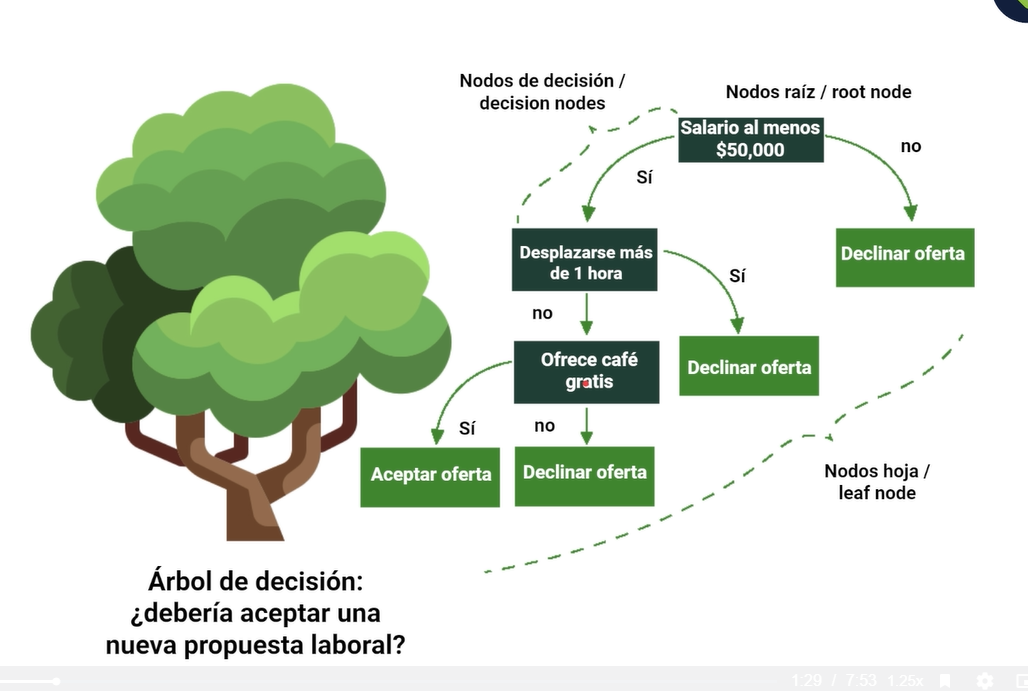

### Cuándo utilizar Árboles de Decisión

**Ventajas**
- Es un algoritmo de caja blanca, es decir, podemos entender el paso a paso utilizado para llegar a una conclusión.
- Los resultados son fáciles de interpretar y entender.
- La combinación de árboles de decisión crean algoritmos más sofisticados como random forest.

**Desventajas**
- Cuando se tienen pocos datos el algoritmo tiende al overfitting.
- Los outliers tienen una gran influencia.
- Crear árboles demasiado complejos puede conllevar a que no se adapten bien a nuevos datos.
- Se pueden crear árboles sesgados si tenemos datasets desbalanceados.

**Cuándo utilizar árboles de decisión**
- Si se busca un algoritmo sencillo y fácil de entender.
- Se tienen datasets grandes.
- Se busca un modelo robusto.
- Se desea analizar datos cuantitativos.
- Problemas de clasificación y regresión.

### Cómo evaluar un modelo de árbol de decisión

Existen diversas métricas para verificar el rendimiento de un modelo:
- **Matriz de Confusión**: nos permite visualizar el desempeño de un algoritmo de aprendizaje supervisado. Cada columna representa el número de predicciones de cada clase y cada fila representa a las instancias en la clase real. 

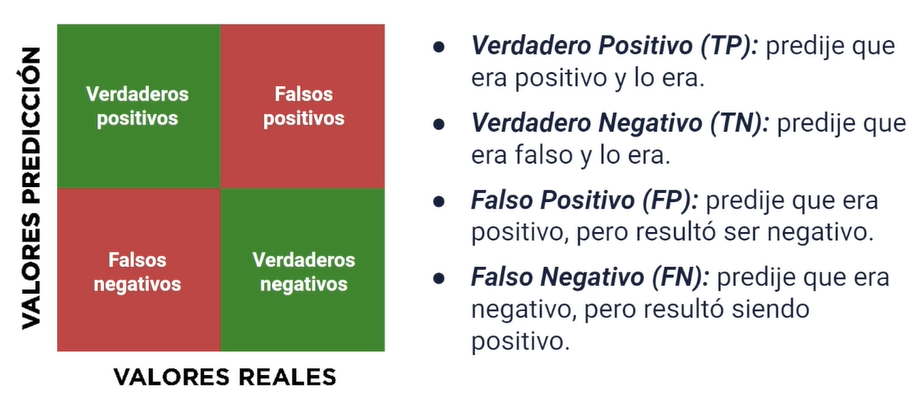
- **Accuracy**: cercanía del resultado al valor real. Es una proporción entre los positivos reales predichos y todos los casos positivos; en forma práctica es el porcentaje total de elementos clasificados correctamente. Consideramos adecuado un accuracy entre 80% y 90%. 

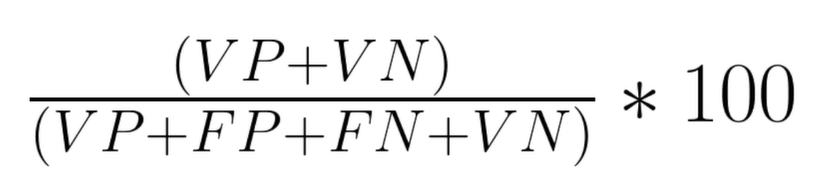
- **Precisión**: nos permite entender en términos de dispersión el conjunto de los datos; cuanto menor es la dispersión, mayor es la precisión. Proporción entre el número de predicciones correctas y el total de predicciones; en forma práctica, es el porcentaje de casos positivos detectados y sirve para medir la calidad del modelo de clasificación.

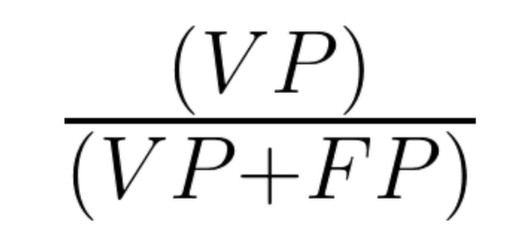
- **Recall o Sensibilidad**: nos permite entender la tasa de verdaderos positivos, es decir, la proporción de casos positivos que fueron correctamente identificados.

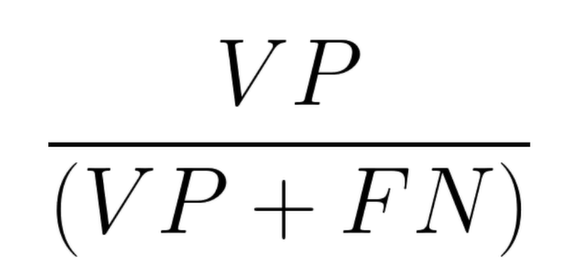
- **Especifidad**: nos permite entender la tasa de verdaderos negativos, es decir, la proporción de casos negativos que fueron correctamente identificados.

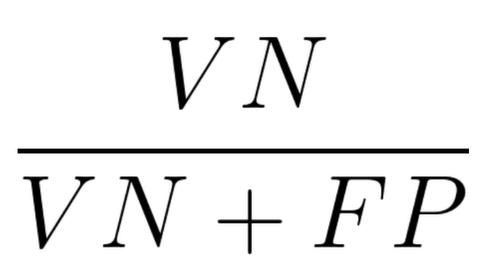
- **F1 Score**: es una métrica muy robusta ya que resume la precisión y la sensibilidad o recall.
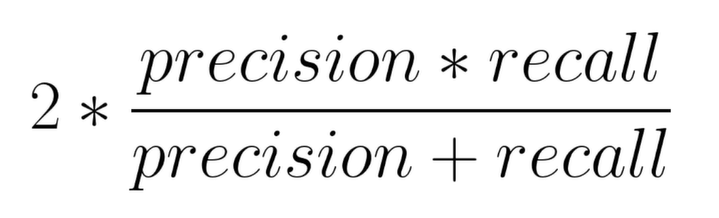


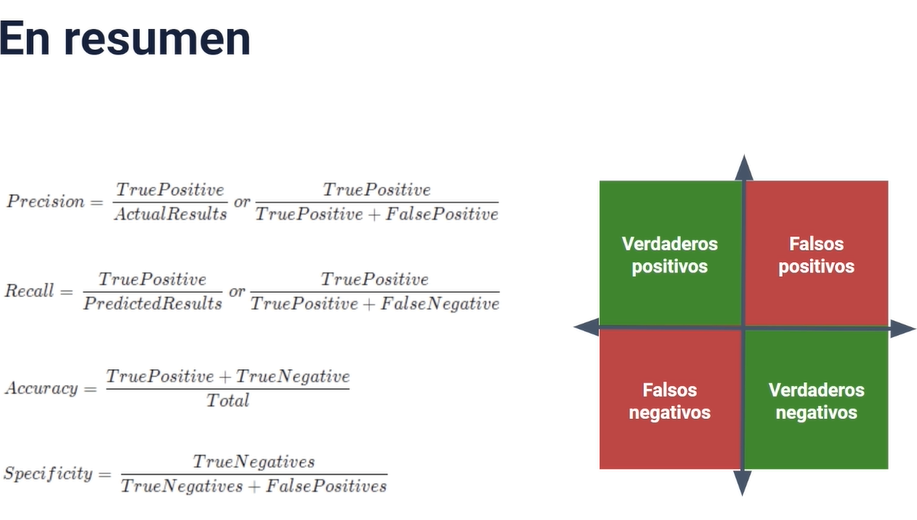

## Proyecto Práctico Árboles de Decisión

Trabajaremos con el [**Car Evaluation Dataset**](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set) el cual consiste en una serie de atributos sobre carros como el precio, número de puertas, capacidad de personas, entre otros, usados para realizar una clasificación.

### Importar las bibliotecas

Importamos las bibliotecas a utilizar

In [30]:
#%pip install category-encoders

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Cargar el dataset


Cargamos los datos

In [2]:
df = pd.read_csv("car_evaluation.csv", header = None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Vemos que nuestro dataset no contiene nombres para las columnas por lo que lo primero será agregarlos

In [3]:
# Creamos una lista con los nombres de las columnas
colNames = ["buying", "maint", "doors", "people", "lugBoot", "safety", "class"]
# Asignamos a nuestro df los nombres de las columnas
df.columns = colNames
# Visualizamos el df
df.head()

,buying,maint,doors,people,lugBoot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Análisis Exploratorio

#### Forma del dataset

Primero visualizaremos la forma del dataset

In [4]:
df.shape

(1728, 7)

Vemos que el dataset se compone de 1728 observaciones y 7 variables

#### Tipo de datos

Ahora procedemos a analizar los tipos de datos que hay en el dataset

In [5]:
df.dtypes

buying     object
maint      object
doors      object
people     object
lugBoot    object
safety     object
class      object
dtype: object

Observamos que inicialmente todas las variables las identifica como tipo categórico

#### Exploración de la variable target

Lo siguiente es explorar un poco la variable Class que es nuestra variable target

In [6]:
# value_counts() crea un conteo de frecuencia de los niveles
df["class"].value_counts() 

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

Podemos ver que *unacc* es el nivel con mayor cantidad de datos, seguido de *acc*

#### Valores faltantes

In [7]:
# isnull() nos retorna un df booleano y con sum() sumamos donde hayan valores verdaderos lo que significa que hay valores faltantes
df.isnull().sum()

buying     0
maint      0
doors      0
people     0
lugBoot    0
safety     0
class      0
dtype: int64

En el dataset no hay valores faltantes

### Procesamiento de los datos

#### Separación de X y Y

Lo primero es separar nuestras variables entre las predictoras **X** y la target **y**

In [8]:
# Con drop eliminamos la columna target y nos quedamos con el resto; axis = 1 indica que eliminamos la columna
X = df.drop(["class"], axis = 1)
# La variable target es Class
y = df["class"]

#### Separación de Training y Testing

Procedemos a separar nuestros datos entre training (70%) y testing (30%)

In [9]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(1209, 6)
(519, 6)
(1209,)
(519,)


#### Codificación de variables categóricas

Como vimos que nuestras variables son categóricas debemos hacer una codificación

In [11]:
# Creamos una variable encoder que contendrá el nombre de las columnas para aplicar la codificación
encoder = ce.OrdinalEncoder(cols = ["buying", "maint", "doors", "people", "lugBoot", "safety"])

# Hacemos la codificación a training
XTrain = encoder.fit_transform(XTrain)
# Hacemos la codificación a testing
XTest = encoder.fit_transform(XTest)

Y verificamos que la codificación haya sido exitosa

In [12]:
XTrain.head()

,buying,maint,doors,people,lugBoot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


### Modelo de clasificación con árboles de decisión

#### Creación del modelo

Creamos nuestro modelo de clasificación

In [14]:
# Creamos el modelo con una profundidad máxima de 2 ya que tenemos pocos datos
model = DecisionTreeClassifier(max_depth = 2, random_state = 42)

#### Entrenamiento del modelo

Entrenamos el modelo de clasificación

In [15]:
# Entrenamos el modelo con los datos de training
model.fit(XTrain, yTrain)

DecisionTreeClassifier(max_depth=2, random_state=42)

#### Predicciones

Realizamos unas predicciones con los datos de training y testing

In [16]:
# Predicciones con training
yPredTrain = model.predict(XTrain)
# Predicciones con testing
yPredTest = model.predict(XTest)

### Evaluación del modelo

#### Accuracy

Calculamos el accuracy del modelo

In [19]:
# Accuracy en Train
trainAccuracy = accuracy_score(yTrain, yPredTrain)
# Accuracy en Test
testAccuracy = accuracy_score(yTest, yPredTest)

print(f"El Accuracy Score de Training es {trainAccuracy}")
print(f"El Accuracy Score de Testing es {testAccuracy}")

El Accuracy Score de Training es 0.7733664185277088
El Accuracy Score de Testing es 0.626204238921002


Podemos ver dos cosas: primero, el accuracy entre training y testing difiere bastante por lo cual podría haber un problema de overfitting; segundo, no alcanzamos valores realmente aceptables

#### Feature Importances

Finalmente, observemos cuáles características fueron más importantes en el modelo

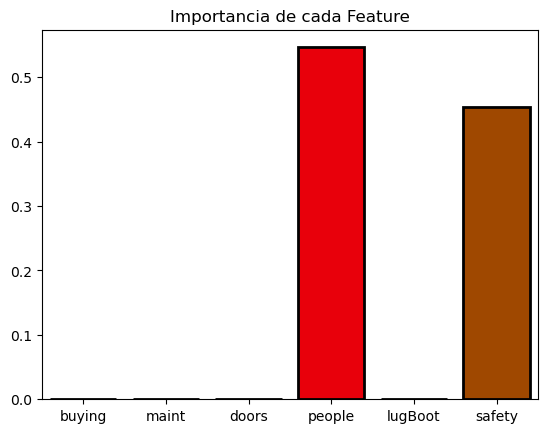

In [20]:
# Variable que contiene los feature importances del modelo
importances = model.feature_importances_

# Creamos un barplot
sns.barplot(
    # En X tenemos las distintas variables
    x = X.columns,
    # En Y tenemos su importancia
    y = importances,
    palette = "bright",
    # Saturación del color
    saturation = 2.0,
    # Bordes de color negro
    edgecolor = "black",
    # Tamaño de las líneas
    linewidth = 2
)
# Título del gráfico
plt.title("Importancia de cada Feature")
plt.show()

Podemos observar que las features más importantes para el modelo de clasificación son **people** y **safety** por lo que podríamos entrenar un nuevo modelo solo con estas dos variables

## Random Forest

Random Forest pertenece a los métodos de ensamble y en el ámbito del machine learning se basan en el uso de los árboles de decisión combinando muchos de ellos para mejorar el performance del modelo.

Un método de ensamble, también conocido como métodos combinados, intentan ayudar a mejorar el rendimiento de los modelos de machine learning utilizando todas las bondades que nos ofrecen los árboles de decisión. Un ensamble es un proceso mediante el cual se cosntruyen estratégicamente varios modelos de machine learning para tratar de resolver un problema en particular.

Random Forest, al igual que los árboles de decisión, pertenece a los algoritmos de aprendizaje supervisado y son usados para clasificación y regresión.

### Primer random forest

Utilizaremos el dataset [**Pima Indians Diabetes**](https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv) para clasificar si un paciente tiene potencialmente diabetes o no a partir de diferentes variables.

#### Importar las bibliotecas

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### Cargar los datos

In [3]:
df = pd.read_csv("pima-indians-diabetes.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Vemos que nuestras variables no tienen nombre por lo que debemos colocarle el nombre a las columnas

In [4]:
colNames = ["1. Number of times pregnant", "2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test", "3. Diastolic blood pressure (mm Hg)", "4. Triceps skin fold thickness (mm)", "5. 2-Hour serum insulin (mu U/ml)", "6. Body mass index (weight in kg/(height in m)^2)", "7. Diabetes pedigree function", "8. Age (years)", "9. Class variable (0 or 1)"]
df.columns = colNames
df.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Análisis de los datos

Primero revisaremos la forma del dataset

In [5]:
df.shape

(768, 9)

Observamos que tenemos 768 observaciones y 9 variables

Ahora analizamos los tipos de datos

In [6]:
df.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

Vemos que las variables con las que trabajamos son numéricas

#### Creación del modelo

Primero separamos los datos en variables predictoras y variable target

In [7]:
# Las variables predictoras son todas excepto la clase
X = df.drop("9. Class variable (0 or 1)", axis = 1)
# La variable target es la clase
y = df["9. Class variable (0 or 1)"]

Ahora dividimos los datos en training y testing con un 30% para este último

In [13]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 42)

Procedemos a crear el modelo

In [14]:
# Empezamos con 10 estimadores o árboles (pocos y luego aumentar a más)
model = RandomForestClassifier(n_estimators = 10, random_state = 42)

#### Entrenamiento del modelo

Entrenamos el modelo

In [15]:
model.fit(XTrain, yTrain)

RandomForestClassifier(n_estimators=10, random_state=42)

Hacemos predicciones en Train y Test

In [16]:
# Predicciones con training
yPredTrain = model.predict(XTrain)
# Predicciones con testing
yPredTest = model.predict(XTest)

#### Evaluación del modelo

Calculamos las métricas

In [18]:
# Accuracy en training
trainAccuracy = accuracy_score(yTrain, yPredTrain)

# Accuracy en testing
testAccuracy = accuracy_score(yTest, yPredTest)

print(f"Accuracy en training {trainAccuracy}")
print(f"Accuracy en testing {testAccuracy}")

Accuracy en training 0.9888268156424581
Accuracy en testing 0.7402597402597403


Observamos una diferencia significativa entre ambos accuracy por lo que podría indicar overfitting

Finalmente, observamos feature importances

In [26]:
# Creamos un df con las feature importances
featureImportances = pd.DataFrame(
    # Creamos un diccionario que contiene la lista de feature y las importancias de las mismas
    {"feature" : list(X.columns), "importance" : model.feature_importances_} 
    # Ordenamos los valores de importancia de forma descendente
).sort_values("importance", ascending = False)
featureImportances

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.262196
5,6. Body mass index (weight in kg/(height in m)^2),0.173489
7,8. Age (years),0.149754
6,7. Diabetes pedigree function,0.119033
2,3. Diastolic blood pressure (mm Hg),0.086000
0,1. Number of times pregnant,0.078183
4,5. 2-Hour serum insulin (mu U/ml),0.074285
3,4. Triceps skin fold thickness (mm),0.057060


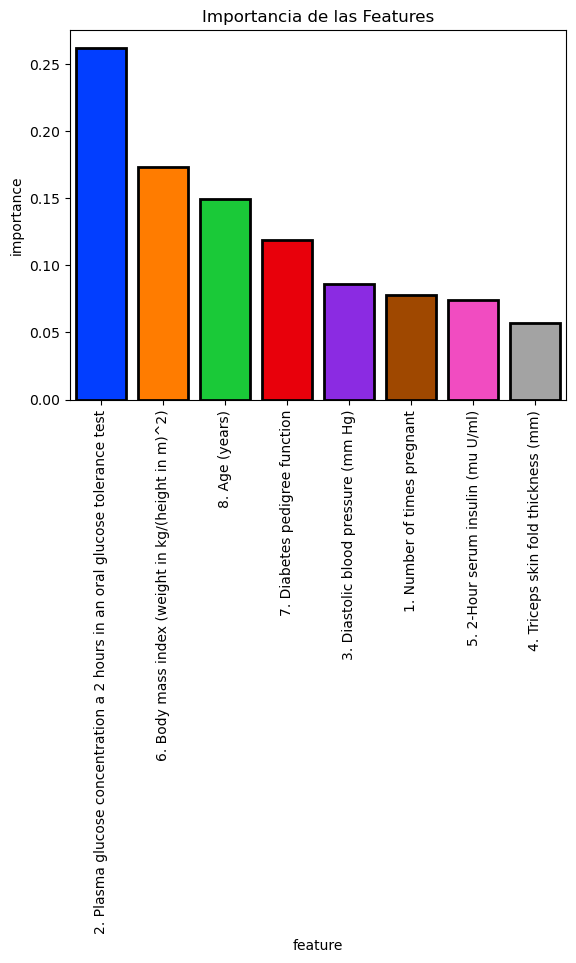

In [25]:
sns.barplot(
    x = featureImportances.feature,
    y = featureImportances.importance,
    palette = "bright",
    saturation = 2.0,
    edgecolor = "black",
    linewidth = 2
)
plt.xticks(rotation = 90)
plt.title("Importancia de las Features")
plt.show()

### Cómo funcionan los Random Forests

Uno de los problemas de utilizar árboles de decisión es que cuando crecen en profundidad tienden al overfitting; una forma de resolaver este problema es combinar varios árboles: random forest. 

Cada árbol de decisión genera su predicción y al final todas estas se someten a una votación a través de un promedio para determinar a qué clase pertenece en última instancia. A mayor cantidad de árboles mayor será el tiempo de procesamiento.

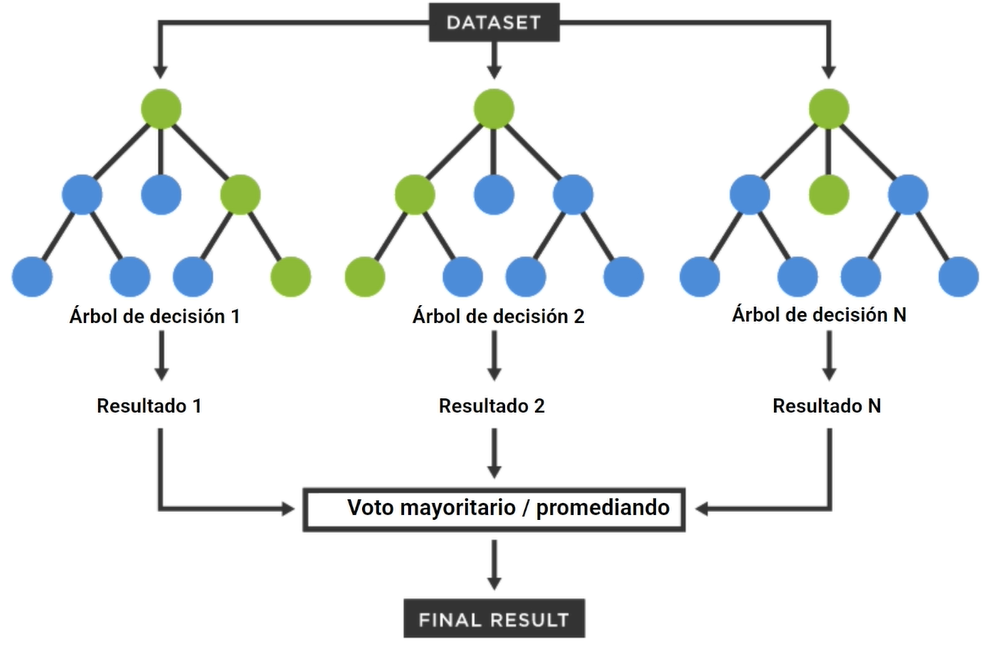

### Cúando utilizar Random Forest

**Ventajas**
- Funciona bien incluso sin ajuste de hiperparámetros.
- Al utilizar múltiples árboles de decisión se reduce el riesgo de overfitting.
- Suele mantenerse estable frente a nuevas muestras de datos.

**Desventajas**
- Es mucho más costoso de crear y ejecutar que un solo árbol de decisión.
- No funciona bien con datasets pequeños.
- Pueda requerir mucho tiempo de entrenamiento.
- Su interpretación a veces se vuelve compleja.

**Cuándo utilizar Random Forest**
- Se busca un modelo fácil y rápido de aplicar.
- Se realizan técnicas de hypertuning de hiperparámetros.
- Problemas de clasificación y regresión.
- Datasets grandes.
- Se busca evitir el overfitting mediante la aplicación de métodos de ensamble.

## Proyecto Práctico Random Forest

Trabajaremos con el [**Car Evaluation Dataset**](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set) el cual consiste en una serie de atributos sobre carros como el precio, número de puertas, capacidad de personas, entre otros, usados para realizar una clasificación.

### Importar las bibliotecas

Importamos las bibliotecas a utilizar

In [27]:
#%pip install category-encoders

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Cargar el dataset


Cargamos los datos

In [46]:
df = pd.read_csv("car_evaluation.csv", header = None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Vemos que nuestro dataset no contiene nombres para las columnas por lo que lo primero será agregarlos

In [47]:
# Creamos una lista con los nombres de las columnas
colNames = ["buying", "maint", "doors", "people", "lugBoot", "safety", "class"]
# Asignamos a nuestro df los nombres de las columnas
df.columns = colNames
# Visualizamos el df
df.head()

,buying,maint,doors,people,lugBoot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Análisis Exploratorio

#### Forma del dataset

Primero visualizaremos la forma del dataset

In [48]:
df.shape

(1728, 7)

Vemos que el dataset se compone de 1728 observaciones y 7 variables

#### Tipo de datos

Ahora procedemos a analizar los tipos de datos que hay en el dataset

In [49]:
df.dtypes

buying     object
maint      object
doors      object
people     object
lugBoot    object
safety     object
class      object
dtype: object

Observamos que inicialmente todas las variables las identifica como tipo categórico

#### Exploración de la variable target

Lo siguiente es explorar un poco la variable Class que es nuestra variable target

In [50]:
# value_counts() crea un conteo de frecuencia de los niveles
df["class"].value_counts() 

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

Podemos ver que *unacc* es el nivel con mayor cantidad de datos, seguido de *acc*

#### Valores faltantes

In [51]:
# isnull() nos retorna un df booleano y con sum() sumamos donde hayan valores verdaderos lo que significa que hay valores faltantes
df.isnull().sum()

buying     0
maint      0
doors      0
people     0
lugBoot    0
safety     0
class      0
dtype: int64

En el dataset no hay valores faltantes

### Procesamiento de los datos

#### Separación de X y Y

Lo primero es separar nuestras variables entre las predictoras **X** y la target **y**

In [52]:
# Con drop eliminamos la columna target y nos quedamos con el resto; axis = 1 indica que eliminamos la columna
X = df.drop(["class"], axis = 1)
# La variable target es Class
y = df["class"]

#### Separación de Training y Testing

Procedemos a separar nuestros datos entre training (70%) y testing (30%)

In [53]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [54]:
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(1209, 6)
(519, 6)
(1209,)
(519,)


#### Codificación de variables categóricas

Como vimos que nuestras variables son categóricas debemos hacer una codificación

In [55]:
# Creamos una variable encoder que contendrá el nombre de las columnas para aplicar la codificación
encoder = ce.OrdinalEncoder(cols = ["buying", "maint", "doors", "people", "lugBoot", "safety"])

# Hacemos la codificación a training
XTrain = encoder.fit_transform(XTrain)
# Hacemos la codificación a testing
XTest = encoder.fit_transform(XTest)

Y verificamos que la codificación haya sido exitosa

In [56]:
XTrain.head()

,buying,maint,doors,people,lugBoot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


### Modelo de clasificación con Random Forest

#### Creación del modelo

Creamos el modelo de random forest

In [73]:
# Modelo con 10 árboles
model = RandomForestClassifier(n_estimators = 10, random_state = 42)

#### Entrenamiento del modelo

Entrenamos el modelo

In [74]:
model.fit(XTrain, yTrain)

RandomForestClassifier(n_estimators=10, random_state=42)

#### Predicciones

Realizamos predicciones con training y testing

In [75]:
# Predicciones con training
yPredTrain = model.predict(XTrain)
# Predicciones con testing
yPredTest = model.predict(XTest)

### Evaluación del modelo

#### Accuracy

Calculamos el accuracy del modelo

In [76]:
trainAccuracy = accuracy_score(yTrain, yPredTrain)
testAccuracy = accuracy_score(yTest, yPredTest)

print(f"Accuracy training {trainAccuracy}")
print(f"Accuracy testing {testAccuracy}")

Accuracy training 0.9975186104218362
Accuracy testing 0.5202312138728323


#### Feature Importances

In [77]:
# Creamos un df con las feature importances
featureImportances = pd.DataFrame(
    # Creamos un diccionario que contiene la lista de feature y las importancias de las mismas
    {"feature" : list(X.columns), "importance" : model.feature_importances_} 
    # Ordenamos los valores de importancia de forma descendente
).sort_values("importance", ascending = False)
featureImportances

,feature,importance
5,safety,0.240469
3,people,0.218290
0,buying,0.201374
1,maint,0.156362
4,lugBoot,0.100134
2,doors,0.083372


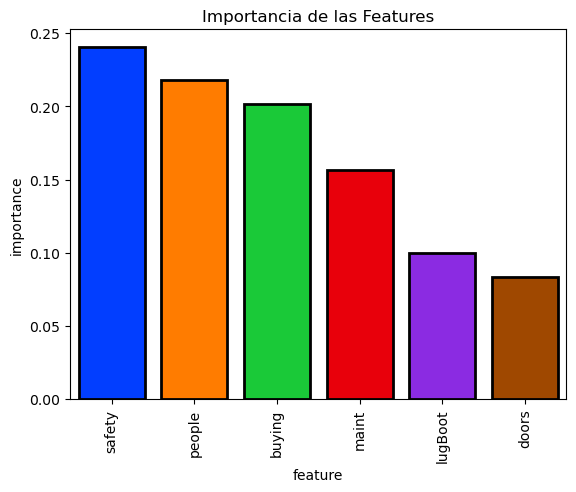

In [78]:
sns.barplot(
    x = featureImportances.feature,
    y = featureImportances.importance,
    palette = "bright",
    saturation = 2.0,
    edgecolor = "black",
    linewidth = 2
)
plt.xticks(rotation = 90)
plt.title("Importancia de las Features")
plt.show()

#### Matriz de Confusión

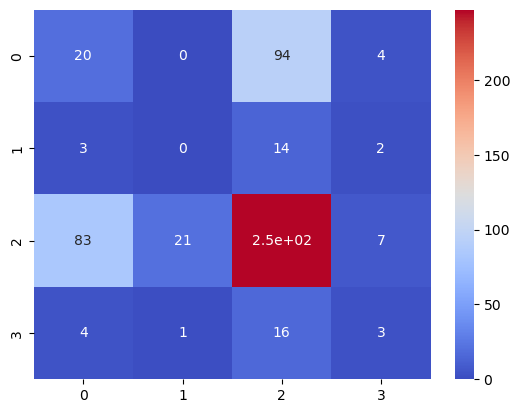

In [81]:
# Creamos la matriz de confusión
cm = confusion_matrix(yTest, yPredTest)

sns.heatmap(
    data = cm,
    cmap = "coolwarm",
    annot = True
)
plt.show()

#### Classification Report

In [84]:
print(classification_report(yTest, yPredTest))

              precision    recall  f1-score   support

         acc       0.18      0.17      0.18       118
        good       0.00      0.00      0.00        19
       unacc       0.67      0.69      0.68       358
       vgood       0.19      0.12      0.15        24

    accuracy                           0.52       519
   macro avg       0.26      0.25      0.25       519
weighted avg       0.51      0.52      0.51       519

